# SMRT tutorial for SnowEx Hackweek


***
##### by Julien Meloche from Université de Sherbrooke
##### visiting Postdoc at Northumbria University (with Melody Sandells)



# Snow Microwave Radiative Tranfer (SMRT) model





Amazing work from Ghislain Picard, Melody Sandells and Henning Löwe!

- Build on previous knowledge on radiative transfer modelling (DMRT and MEMLS)
- Allows for intercomparison of different model elements: electromagnetic theory, microstructure, ice permittivity and much more!
- Modularity (we keep adding more stuff!)
- Written in Python

## Simply put
### SMRT allows you to simulate measurements of snow or ice from radiometer and RADAR.

<img src = "SWE_retrieval_SMRT.png" width =900>

***
<br>

### Snowpack Data or inputs

- Multi layered snowpack (density, temperature, ...)
- microstructure model from ACF

### Electromagnetic model
#### Yields ka, ks and effective permittivity for EM theory and microstructure model.

- Dense Media Radiative Transfer (DRMT) : for example, using DMRT, represents the microstructure as aggregates of ice spheres in air are represented in each snow layers using the equivalent radius = $R_{0}$  and stickiness ($\tau$).
<br><br>
$ \large R_{0} = \frac{3}{SSA \rho_i} $
<br><br>
- Improved Born Approximation (IBA) : represents snow layer in a random two phase ice/air medium. 
- ACF of the medium can be assumed to be exponential but you don't have to! Numerous microstructure (or ACF) can be used with IBA, even dense media. 
- One easy way would be to define the correlation length (porod length) of the snow microstructure with the debye equation using the snow density $\rho_s$ and the SSA.
<br><br>
$ \large l_c = \kappa \frac{4(1-\phi_i)}{\rho_i SSA} $
<br><br>
where the volume fraction is define as such $ \phi_i = \rho_s/\rho_i$.
<br><br>
Sometimes, an empirical factor ($\kappa$) called the debye factor is used to adjust the scattering depending on frequency and grain type but we should avoid this in the future!!
<br><br>
check this great article https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2021AV000630
***

<img src="SMRT.png" width = 700>

### SMRT using the DORT solvers will solve the radiative transfer equation (RTE) through all layers
<br><br>
#### RTE:
$ \large \mu \frac{\partial \mathbf{I}(\mu,\phi,z)}{\partial_z} = -\kappa_e(\mu,\phi,z)\mathbf{I}(\mu,\phi,z)+ \frac{1}{4\pi} \iint_{4\pi}P(\mu,\phi;\mu',\phi',z)\mathbf{I}(\mu',\phi',z)d\Omega'+\kappa_a(\mu,\phi,z)\alpha T(z)1$
<br><br>
<br>
<img src="Multilayered-medium_SMRT.jpg">
<br>

### Final output is $T_B$ or $\sigma_0$ with polarisation H and V
***

#### Even with all this complexity, SMRT can be easy and simple to use.

In [1]:
from smrt import make_snowpack, make_model, sensor_list

#prepare inputs in SI
thick = [100] 
corr_length = [5e-5] # 50 microns
temperature = [270] # kelvin
density = [320] #kg/m^3

#create the snowpack
snowpack = make_snowpack(thickness = thick,
                         microstructure_model = "exponential",
                         density = density,
                         temperature = temperature,
                         corr_length = corr_length)

#create the sensor
#set frequency to 37 GHz and incident angle to 55
radiometer = sensor_list.passive(37e9, 55)

#create the model
m = make_model("iba", "dort")

#run the model
result = m.run(radiometer, snowpack)

#outputs
print(f' TbH = {result.TbV()}, TbV = {result.TbH()}')

 TbH = 268.1738175958132, TbV = 251.64114639153686


### SMRT also allows you to set a substrate and atmosphere along with your snowpack

<img src="atmo_substrat_smrt.png" width="400">

### Other cool stuff
- liquid water
- saline snow
- sea ice (FYI and MYI)
- rough surface and interface of layers
- new sensor -> Radar altimetery which adds a time dependent RTE solver

### More info

- Documentation : 
https://smrt-model.science/documentation.html

- Github page : 
https://github.com/smrt-model

- Reference paper : 
https://gmd.copernicus.org/articles/11/2763/2018/gmd-11-2763-2018.html

***

# How to install SMRT

### Install Python and dependencies
#### Easiest with Anaconda
SMRT is developed with the highest stable version of Python but also work with python 2.7 series and 3.4 or higher. Anaconda is the recommended distribution to get Python as it contains numerous packages needed for scientific computations and analysis. This is an open source distribution available for Linux, Windows and MacOS.

In the anaconda prompt ... <br><br>
create an virtual environment for SMRT
```console
conda create env --name smrt
```
then activate your env
```console
conda activate smrt
```
install dependencies
```console
conda install numpy scipy xarray pandas six
```

### You have two option to install SMRT...
#### Not recommended because not up to date. SMRT is in constant developpement.
#### 1. Using pip install from pypi.org:  https://pypi.org/project/smrt/#description

install pip in your env
```console
conda install pip
```
install smrt with pip
```console
pip install smrt
```

#### 2. Best way is to clone the SMRT repo from github.
Make sure git is install on your computer (usually already install on ubuntu)

If not, I like git bash on windows; check to install on your machine https://git-scm.com/download/win

Open a git bash terminal, run this command where you want smrt to clone the repo.
##### Github page : https://github.com/smrt-model

```console
git clone https://github.com/smrt-model/smrt.git
```
##### Optional : Clone smrt tutorials for some exercices!
```console
git clone https://github.com/smrt-model/tutorials.git
```

Check the directory of SMRT
```console
cd smrt
pwd
```
You can go back to this directory to make sure you are up to date new changes in SMRT. <br>
Run this command
```console
git pull
```

Now you add to specify to python the path to smrt
##### Linux
add this to your ~/.bashrc file
```console
PYTHONPATH=$PYTHONPATH:/the/full/path/to/smrt
```

##### Windows
1. Go to settings, search for 'edit the system environment variables'
2. Click on 'Environment Variables'
3. Create new system variable
4. Name it PYTHONPATH
5. Enter or browse to the path to your SMRT directory


## Try to import SMRT in python now!!
***

### First, lets simulate backscatter and brigthness temperature for different angles

In [2]:
#import library we need for processing
import numpy as np
import matplotlib.pyplot as plt

#import smrt function that are needed
from smrt import make_model, make_snowpack, make_soil, sensor_list
from smrt.utils import dB

In [3]:
#prepare inputs in SI
thick = [0.5, 1] 
corr_length = [5e-5, 1e-5]
temperature = [270, 268] 
density = [320, 400] #kg/m^3

#add frozen soil
soil = make_soil('soil_wegmuller', complex(3.34,0.005), temperature = 265, roughness_rms = 0.017)

#create the snowpack
snowpack = make_snowpack(thickness = thick,
                         microstructure_model = "exponential",
                         density = density,
                         temperature = temperature,
                         corr_length = corr_length,
                         substrate = soil)
snowpack

C:\Users\julie\smrt\smrt\core\snowpack.py:318: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(substrate, index=['s']), sort=False, verify_integrity=True)
C:\Users\julie\smrt\smrt\core\snowpack.py:318: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(substrate, index=['s']), sort=False, verify_integrity=True)


Snowpack:       layer                                                                 \
  thickness microstructure_model density temperature liquid_water salinity   
0       0.5          Exponential   320.0       270.0          0.0      0.0   
1       1.0          Exponential   400.0       268.0          0.0      0.0   
s       NaN                  NaN     NaN         NaN          NaN      NaN   

  microstructure             interface      substrate                
     frac_volume corr_length      name           name roughness_rms  
0       0.349078     0.00005      Flat            NaN           NaN  
1       0.436348     0.00001      Flat            NaN           NaN  
s            NaN         NaN       NaN  SoilWegmuller         0.017

In [4]:
# prepare a list for theta from 5 to 65 by step of 5
#theta = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
theta = np.arange(5,70,5)

# prepare one sensor at 13 GHz
radiometer = sensor_list.passive(13e9, theta)


# prepare the model and run it successively for each sensor
m = make_model("iba", "dort")
res_p = m.run(radiometer, snowpack)

In [5]:
# results are xarray!
res_p.Tb()

<xarray.DataArray (theta: 13, polarization: 2)>
array([[260.89763897, 260.8123033 ],
       [261.00961773, 260.66509032],
       [261.19687691, 260.40599081],
       [261.45921849, 260.01616175],
       [261.79479804, 259.46720549],
       [262.19689264, 258.69836773],
       [262.64879315, 257.63887635],
       [263.11654465, 256.1839463 ],
       [263.53119233, 254.1649303 ],
       [263.75417109, 251.31148628],
       [263.50271588, 247.17194313],
       [262.17819696, 240.95246369],
       [258.43554791, 231.17379376]])
Coordinates:
  * theta         (theta) float64 5.0 10.0 15.0 20.0 ... 50.0 55.0 60.0 65.0
  * polarization  (polarization) <U1 'V' 'H'
Attributes:
    mode:     P

In [6]:
#result has a dimension theta because we provided a list of of angles
res_p.TbH()

<xarray.DataArray (theta: 13)>
array([260.8123033 , 260.66509032, 260.40599081, 260.01616175,
       259.46720549, 258.69836773, 257.63887635, 256.1839463 ,
       254.1649303 , 251.31148628, 247.17194313, 240.95246369,
       231.17379376])
Coordinates:
  * theta         (theta) float64 5.0 10.0 15.0 20.0 ... 50.0 55.0 60.0 65.0
    polarization  <U1 'H'
Attributes:
    mode:     P

In [7]:
#do the same for a radar
radar  = sensor_list.active(13e9, theta)
res_a = m.run(radar, snowpack)

res_a.sigmaHH()

<xarray.DataArray (theta_inc: 13)>
array([1.96966459e-04, 1.95098609e-04, 1.91949203e-04, 1.87414098e-04,
       1.81378042e-04, 1.73625009e-04, 1.63966835e-04, 1.52203294e-04,
       1.38113614e-04, 1.21508330e-04, 1.02301217e-04, 8.06495785e-05,
       5.71967927e-05])
Coordinates:
  * theta_inc  (theta_inc) float64 5.0 10.0 15.0 20.0 ... 50.0 55.0 60.0 65.0

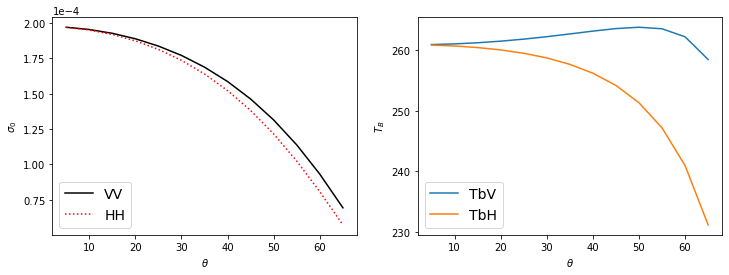

In [8]:
#lets do a plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (12,4))
plt.rcParams.update({'font.size': 14})
ax1.ticklabel_format(axis='both', style='sci', scilimits=(0,2))
ax1.plot(theta, res_a.sigmaVV(), 'k-',label = 'VV')
ax1.plot(theta, res_a.sigmaHH(), 'r:',label = 'HH')
ax1.set_ylabel('$\sigma_0$')
ax1.set_xlabel("$\\theta$")
ax1.legend(loc = 3)


ax2.plot(theta, res_p.TbV(), label = 'TbV')
ax2.plot(theta, res_p.TbH(), label = 'TbH')
ax2.set_ylabel('$T_B$')
ax2.set_xlabel('$\\theta$')
ax2.legend()

***
### Sensitivity study of snow parameters on brigthness temperatures

In [9]:
#set constant parameters for the study
thick = [0.5] 
corr_length = [1e-4]
temperature = [268] 
density = [320]

#add frozen soil
soil = make_soil('soil_wegmuller', complex(3.34,0.005), temperature = 265, roughness_rms = 0.017)

#set radiometer for SWE retrievals
radiometer19 = sensor_list.passive(19e9, 55)
radiometer37 = sensor_list.passive(37e9, 55)
m = make_model("iba", "dort")


#sensitivity of depth
depth_array = np.arange(10,201,5)/100
snowpack = [make_snowpack(thickness = [thick], microstructure_model = "exponential", density = density,
                          temperature = temperature, corr_length = corr_length, substrate = soil) for thick in depth_array]

res_19_depth = m.run(radiometer19, snowpack)
res_37_depth = m.run(radiometer37, snowpack)

#sensitivity of temperature
temp_array = np.arange(260,280,1)
snowpack = [make_snowpack(thickness = thick, microstructure_model = "exponential", density = density,
                          temperature = [temp], corr_length = corr_length, substrate = soil) for temp in temp_array]

res_19_temp = m.run(radiometer19, snowpack)
res_37_temp = m.run(radiometer37, snowpack)

#sensitivity of density
density_array = np.arange(200,500,20)
snowpack = [make_snowpack(thickness = thick, microstructure_model = "exponential", density = [density],
                          temperature = temperature, corr_length = corr_length, substrate = soil) for density in density_array]

res_19_density = m.run(radiometer19, snowpack)
res_37_density = m.run(radiometer37, snowpack)

#sensitivity of corr length
lc_array = np.arange(5e-5,1e-4,0.5e-5)
snowpack = [make_snowpack(thickness = thick, microstructure_model = "exponential", density = density,
                          temperature = temperature, corr_length = [lc], substrate = soil) for lc in lc_array]

#the trick is to feed a list of snowpack from list comprehension
res_19_lc = m.run(radiometer19, snowpack)
res_37_lc = m.run(radiometer37, snowpack)

### Plot the results

Text(0.5, 0, 'Correlation length (m)')

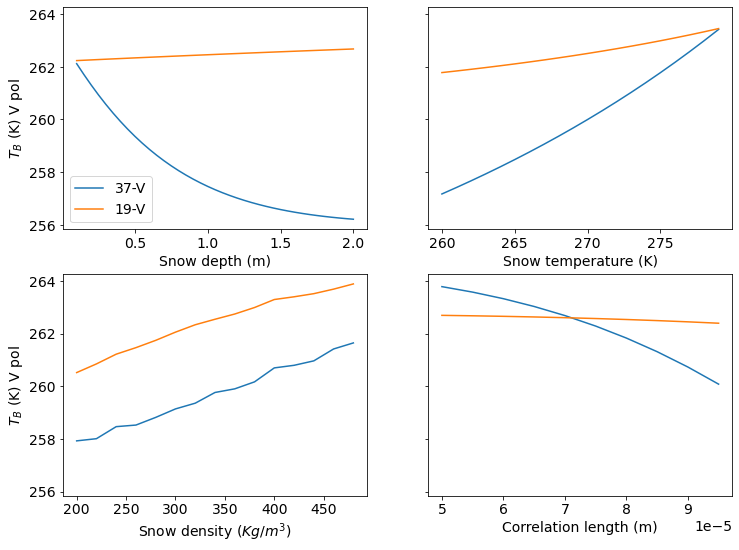

In [10]:
#create a subfigure for each parameter studied
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12,9), sharey = True)
plt.rcParams.update({'font.size': 14})

#plot snow depth
ax1.plot(depth_array, res_37_depth.TbV().values, label = '37-V')
ax1.plot(depth_array, res_19_depth.TbV().values, label = '19-V')
ax1.set_xlabel('Snow depth (m)')
ax1.set_ylabel('$T_B$ (K) V pol')
ax1.legend()

#plot temperature
ax2.plot(temp_array, res_37_temp.TbV().values)
ax2.plot(temp_array, res_19_temp.TbV().values)
ax2.set_xlabel('Snow temperature (K)')

#plot density
ax3.plot(density_array, res_37_density.TbV().values)
ax3.plot(density_array, res_19_density.TbV().values)
ax3.set_xlabel('Snow density ($Kg/m^3$)')
ax3.set_ylabel('$T_B$ (K) V pol')

#plot corr length
ax4.plot(lc_array, res_37_lc.TbV().values)
ax4.plot(lc_array, res_19_lc.TbV().values)
ax4.set_xlabel('Correlation length (m)')

#### SWE  -----> $T_B$19V - $T_B$37V  
SWE can be link empirically to the difference between $T_B$ at 19 and 37 GHz (Kelly et al. 2003). However, the empirical relation might not hold for all snow types and conditions. This is where a radiative transfer can help to link brithness temperature and snow properties!!
<br>
Kelly et al. 2003 : https://ieeexplore.ieee.org/document/1196041/

### Add dimension to your result for a more compact way

In [11]:
#look at previous results for depth
res_19_depth.TbV()

<xarray.DataArray (snowpack: 39)>
array([262.2357122 , 262.24897279, 262.2620833 , 262.27505867,
       262.28790974, 262.30064491, 262.31327101, 262.32579376,
       262.33821804, 262.35054809, 262.36278765, 262.37494005,
       262.38700827, 262.398995  , 262.41090268, 262.42273354,
       262.43448961, 262.44617276, 262.45778469, 262.469327  ,
       262.48080114, 262.49220848, 262.50355027, 262.51482768,
       262.52604181, 262.53719366, 262.54828419, 262.55931429,
       262.57028479, 262.58119646, 262.59205004, 262.60284622,
       262.61358564, 262.62426892, 262.63489662, 262.6454693 ,
       262.65598745, 262.66645158, 262.67686213])
Coordinates:
    theta         float64 55.0
    polarization  <U1 'V'
  * snowpack      (snowpack) int64 0 1 2 3 4 5 6 7 8 ... 31 32 33 34 35 36 37 38
Attributes:
    mode:     P

#### Let's define multiple dimensions and use the full power of xarray and pandas

In [12]:
#define a list of snowpack
depth_array = np.arange(10,201,5)/100
snowpack = [make_snowpack(thickness = [thick], microstructure_model = "exponential", density = density,
                          temperature = temperature, corr_length = corr_length, substrate = soil) for thick in depth_array]

#sensor can have two frequency
#use the common AMSRE satellite
sensor = sensor_list.amsre(['19', '37'])

#define dimension of the list of snowpack
res_depth = m.run(sensor, snowpack, snowpack_dimension = ('depth', depth_array))
res_depth.Tb()

<xarray.DataArray (frequency: 2, depth: 39, polarization: 2)>
array([[[262.2177172 , 246.22248543],
        [262.2321626 , 246.22724061],
        [262.24645025, 246.23193937],
        [262.26059338, 246.23659743],
        [262.2746017 , 246.24122576],
        [262.28848279, 246.2458325 ],
        [262.30224289, 246.250424  ],
        [262.31588723, 246.25500533],
        [262.32942035, 246.25958066],
        [262.34284624, 246.26415344],
        [262.35616843, 246.26872657],
        [262.36939011, 246.27330251],
        [262.38251414, 246.27788335],
        [262.39554316, 246.28247087],
        [262.40847957, 246.28706659],
        [262.42132558, 246.2916718 ],
        [262.43408323, 246.29628762],
        [262.44675443, 246.30091497],
        [262.45934095, 246.30555465],
        [262.47184442, 246.31020732],
...
        [257.60687527, 239.87031351],
        [257.49542479, 239.71830285],
        [257.39221496, 239.57695964],
        [257.29671766, 239.44560873],
        [257.20843344, 239.32361274],
        [257.12689062, 239.21037062],
        [257.05164434, 239.1053161 ],
        [256.98227548, 239.00791612],
        [256.91838959, 238.9176693 ],
        [256.85961575, 238.83410432],
        [256.80560547, 238.75677846],
        [256.75603156, 238.68527601],
        [256.71058705, 238.61920692],
        [256.66898412, 238.55820531],
        [256.63095305, 238.50192815],
        [256.59624125, 238.45005399],
        [256.56461226, 238.40228167],
        [256.53584484, 238.35832918],
        [256.50973209, 238.3179325 ],
        [256.48608063, 238.28084459]]])
Coordinates:
    theta         float64 55.0
  * polarization  (polarization) <U1 'V' 'H'
  * depth         (depth) float64 0.1 0.15 0.2 0.25 0.3 ... 1.85 1.9 1.95 2.0
  * frequency     (frequency) float64 1.87e+10 3.65e+10
Attributes:
    mode:     P

In [13]:
#result can also be set to a dataframe
res_depth.to_dataframe()

,19H,19V,37H,37V
depth,,,,
0.10,246.222485,262.217717,245.944416,262.160576
0.15,246.227241,262.232163,245.421831,261.770583
0.20,246.231939,262.246450,244.924934,261.398275
0.25,246.236597,262.260593,244.454346,261.044709
0.30,246.241226,262.274602,244.009938,260.710197
0.35,246.245833,262.288483,243.591160,260.394621
0.40,246.250424,262.302243,243.197215,260.097592
0.45,246.255005,262.315887,242.827156,259.818556
0.50,246.259581,262.329420,242.479956,259.556849


### You can always find a more efficient way to work...

#### but try to find a way that suits you and that you understand
***

## Next, investigate different ways to parametrize the microstructure with SMRT

##### Reminder: Equation for SSA
#### Radius for DMRT
$ \large R_{0} = \frac{3}{SSA \rho_i} $
#### Porod length from debye equation
$ \large l_c = \kappa \frac{4(1-\phi_i)}{\rho_i SSA} $
<br><br>

In [14]:
#import constant from SMRT
from smrt.core.globalconstants import DENSITY_OF_ICE
#define function to get microstructure parameters from ssa
def ssa_to_R(ssa, density):
    #converting SSA to eq radius
    return 3/(DENSITY_OF_ICE*ssa)

def ssa_to_l(ssa, density):
    #converting SSA to correlation length
    f = density/DENSITY_OF_ICE
    l_d = 4 * (1-f)/(DENSITY_OF_ICE*ssa)
    return l_d

In [15]:
#start from SSA, which you would get from field measurements
ssa_array = np.arange(10, 65, 5)

#set other parameters for the study
#thick must be a list or array to infer number of layer
thick = [0.5] 
temperature = 268 
density = 320

#add frozen soil
soil = make_soil('soil_wegmuller', complex(3.34,0.005), temperature = 265, roughness_rms = 0.017)

In [16]:
#create sensor for amsre channel
radio  = sensor_list.amsre('37')

#set electromagnetic model
#iba can run most of the microstructure model
m_iba = make_model("iba", "dort")
#DMRT only can run SHS
m_dmrt = make_model('dmrt_qca_shortrange', 'dort')
#SCE strong contrast expansion (new model for high density)
m_sce = make_model("sce_torquato21", "dort")

#set snowpack with different microstructure model
#Microstructure exponential
snowpack_exp = [make_snowpack(thickness = thick, microstructure_model = "exponential", density = density,
                          temperature = temperature, corr_length = [ssa_to_l(ssa, density)], substrate = soil) for ssa in ssa_array]
#Microstructure IND
snowpack_ind = [make_snowpack(thickness = thick, microstructure_model = "independent_sphere", density = density,
                          temperature = temperature, radius = [ssa_to_R(ssa, density)], substrate = soil) for ssa in ssa_array]
#Microstructure SHS
snowpack_shs = [make_snowpack(thickness = thick, microstructure_model = "sticky_hard_spheres", density = density,
                          temperature = temperature, radius = [ssa_to_R(ssa, density)], stickiness = 0.3, substrate = soil) for ssa in ssa_array]

#run result for iba EXP
res_iba_exp = m_iba.run(radio, snowpack_exp, snowpack_dimension = ('ssa', ssa_array))

#run result for iba IND
res_iba_ind = m_iba.run(radio, snowpack_ind, snowpack_dimension = ('ssa', ssa_array))

#run result for iba SHS
res_iba_shs = m_iba.run(radio, snowpack_shs, snowpack_dimension = ('ssa', ssa_array))

#run result for DMRT SHS
res_dmrt_shs = m_dmrt.run(radio, snowpack_shs, snowpack_dimension = ('ssa', ssa_array))

#run result for sce EXP
res_sce_exp = m_sce.run(radio, snowpack_exp, snowpack_dimension = ('ssa', ssa_array))

C:\Users\julie\anaconda3\envs\cryosat\lib\site-packages\scipy\integrate\_quadrature.py:635: ComplexWarning: Casting complex values to real discards the imaginary part
  h = Ninterv * np.asarray(dx, dtype=float)


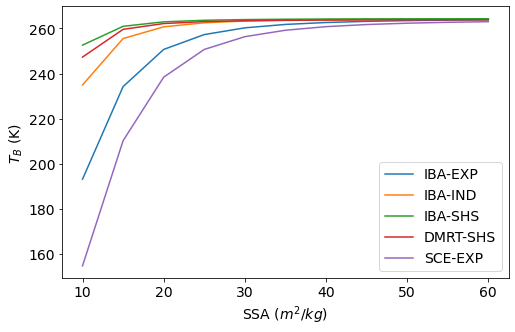

In [17]:
#create a subfigure for each parameter studied
fig = plt.figure(figsize = (8,5))
plt.rcParams.update({'font.size': 14})

#plot the results
plt.plot(res_iba_exp.ssa, res_iba_exp.TbV(), label = 'IBA-EXP')
plt.plot(res_iba_ind.ssa, res_iba_ind.TbV(), label = 'IBA-IND')
plt.plot(res_iba_shs.ssa, res_iba_shs.TbV(), label = 'IBA-SHS')
plt.plot(res_dmrt_shs.ssa, res_dmrt_shs.TbV(), label = 'DMRT-SHS')
plt.plot(res_sce_exp.ssa, res_sce_exp.TbV(), label = 'SCE-EXP')
plt.xlabel('SSA ($m^2/kg)$')
plt.ylabel('$T_B$ (K)')
plt.legend()

#### The choice of the microstructure and electromagnetic model does have an impact, especially for low SSA in this case.
***

## Conclusion


- Allows you to simulate measurements of snow or ice from radiometer and RADAR.
- Comparaison between models components (electromagnetic, microstructure, ...) and unified radiative transfer modelling into one models.
- Easy to use with python!


#### For more exercices... see the tutorials on github page

### More info

- Documentation : 
https://smrt-model.science/documentation.html

- Github page : 
https://github.com/smrt-model

- Reference paper : 
https://gmd.copernicus.org/articles/11/2763/2018/gmd-11-2763-2018.html

***

### Potential for SMRT workshop at Alfred Wagner Institute in 2023 (focus on sea ice)